# Time Series Analysis Forecasting : Sales

## Librarys

In [26]:
#Librarys
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

## 1. Load Data

In [27]:
# Meloading dataset dari file .csv
data = pd.read_csv('tute1.csv')

# Mengubah nama feature tanggal dari 'Unnamed: 0' ke dalam 'Date'
data.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

data.head()

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


## 2. Dataset preparation

In [28]:
# Dimensi dataset
data.shape

(100, 4)

In [29]:
# Tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [30]:
# Mengubah data bulan ke dalam bentuk angka
data['Date'] = data['Date'].replace(r'^Jan', '01', regex=True).replace(r'^Feb', '02', regex=True).replace(r'^Mar', '03', regex=True).replace(r'^Apr', '04', regex=True).replace(r'^May', '05', regex=True).replace(r'^Jun', '06', regex=True).replace(r'^Jul', '07', regex=True).replace(r'^Aug', '08', regex=True).replace(r'^Sep', '09', regex=True).replace(r'^Oct', '10', regex=True).replace(r'^Nov', '11', regex=True).replace(r'^Dec', '12', regex=True)
data.head()

,Date,Sales,AdBudget,GDP
0,03-81,1020.2,659.2,251.8
1,06-81,889.2,589.0,290.9
2,09-81,795.0,512.5,290.8
3,12-81,1003.9,614.1,292.4
4,03-82,1057.7,647.2,279.1


In [31]:
# Menambahkan tanggal pada setiap data 'Date'
data['Date'] = '01-' + data['Date']

# Mengubah format tanggal menjadi yyyy-mm-dd
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

data.head()

,Date,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


## 3. Missing Values Detection

In [32]:
# Deteksi missing values
missing_pct = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
missing_pct.head()

GDP         0.0
AdBudget    0.0
Sales       0.0
Date        0.0
dtype: float64

**Deteksi missing values** <br>
Tidak ditemukan adanya missing values pada feature Sales. Sehingga dataset sudah memenuhi satu syarat dari time series analysis.

## 4. Index Data

In [33]:
# Mengubah features 'Date' menjadi index dataset
data.index = data[data.columns[0]]
data = data.drop(columns={'Date'})
data.head()

,Sales,AdBudget,GDP
Date,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


In [34]:
# Menghapus features yang tidak digunakan untuk time series analysis
data = data.drop(columns={'AdBudget','GDP'})
data.head()

,Sales
Date,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


**Univariate Time Series** <br>
Dikarenakan time series analysis yang dilakukan adalah univariat, maka feature 'Date' kami ubah sebagai index dataset dan features selain 'Sales' kami hapuskan.

In [35]:
data.tail()

,Sales
Date,
2004-12-01,1018.7
2005-03-01,1112.5
2005-06-01,997.4
2005-09-01,826.8
2005-12-01,992.6


## 5. Plot Waktu vs. Sales

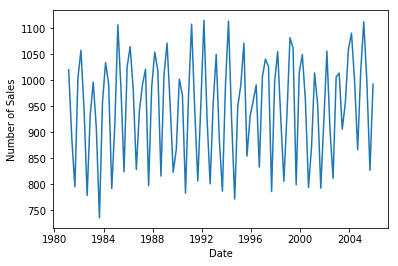

In [36]:
# Plot features Sales
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.plot(data)

**Plot Waktu vs. Sales** <br>
Dari plot di atas dapat dikatakan bahwa Sales memiliki pola yang serupa dari tahun 1980 sampai dengan 2005. Sehingga dapat dikatakan bahwa perilaku Sales dari 1980 hingga 2005 serupa. Sehingga dapat disimpulkan bahwa tidak ada musiman pada feature Sales. Sehingga dapat diduga parameter d pada model ARIMA bernilai 0. <br>
<br>
**Stasioner Ragam** <br>
Dari plot di atas terlihat bahwa feature Sales sudah memenuhi stasioner ragam/variansi. Dimana range antara titik tertinggi dengan titik terendah sebagaian besar memiliki jarak yang sama. Sehingga tidak perlu dilakukan transformasi log.

## 6. Stasionary Checking with Rolling Statistics

In [37]:
# determine rolling statistics
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean, rolstd)

                 Sales
Date                  
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01 

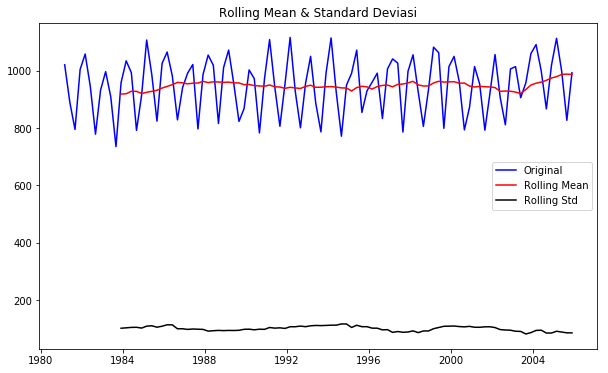

In [38]:
# plot rolling statistics
plt.figure(figsize=(10,6))

orig = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviasi')
plt.show(block=False)

**Rolling Statistics** <br>
Dari plot di atas dapat dilihat bahwa plot dari rolling mean dan rolling std berupa garis lurus (tidak memiliki trens ataupun pola tertentu). Sehingga dapat dikatakan bahwa feature Sales sudah stationer dalam ragam/varians dan rataan/mean.

## 7. Dickey Fuller Test

In [39]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
datatest = adfuller(data['Sales'],autolag='AIC')
dataoutput = pd.Series(datatest[0:4],index=['Test Statistics','p-value','#Lag Used','Number of Observations Used'])
for key,value in datatest[4].items():
    dataoutput['Critical Value (%s)'%key] = value
print(dataoutput)

Result of Dickey-Fuller Test:
Test Statistics                -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


**Dickey-Fuller Testing** <br>
Dalam kasus ini diduga bahwa (H0) feature Sales tidak stasioner. Kemudian dari hasil DF testing didapat bahwa nilai p-value nya 0.017 yang lebih kecil daripada nilai alfa 0.05. Sehingga dari DF testing dapat disimpulkan H0 ditolak. Artinya, feature 'Sales' sudah stasioner mean. Oleh karena itu tidak perlu dilakukan diferensing pada feature Sales.

## 8. Seasonal Decompose for Checking Seasonal Sales

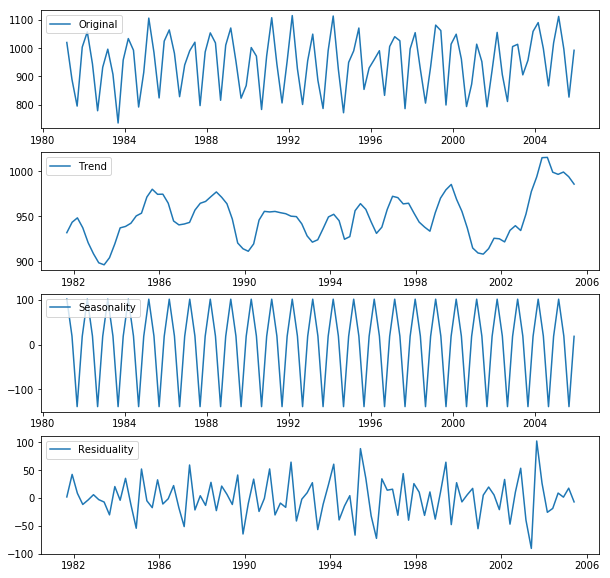

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10,10))

decomposition = seasonal_decompose(data)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuality')
plt.legend(loc='upper left')

**Seasonal Decompose** <br>
Dari plot di atas dapat dilihat bahwa: <br>
1. Data Original stasioner ragam/varians. <br>
2. Data tidak memiliki trend yang cukup sigfinikan apakah naik/turun. <br>
3. Terdapat pola yang sama dalam jangka waktu beberapa bulan bahwa terdapat penurunan yang signifikan terhadap Sales dan kemudian terdapat kenaikan yang cukup signifikan pula dari Sales. Hal tersebut terus berulang ulang. Sehingga nilai d untuk model ARIMA adalah 0 <br>
4. Rata-rata nilai prediktor tidak memiliki gap yang terlalu besar dengan realnya.

## 9. Ploting ACF & PACF

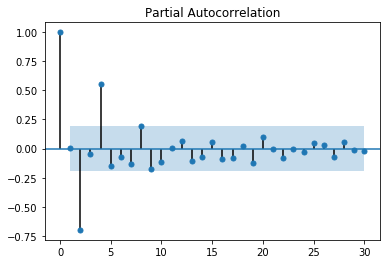

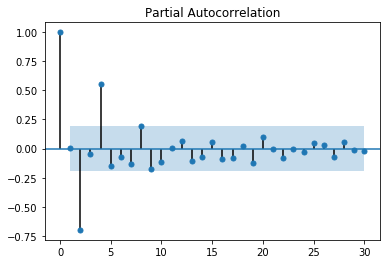

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=30)

**Partial Autocorellation** <br>
Dari plot di atas dapat dilihat bahwa pacf terpotong pada lag 4. Sehingga nilai p untuk model ARIMA adalah 4.

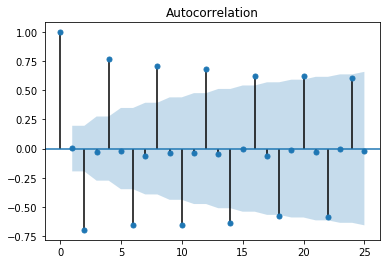

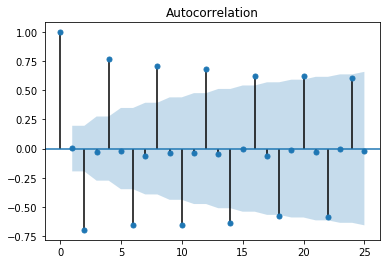

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=25)

**Autocorrelation** <br>
Dari plot di atas dapat terlihat bahwa titik sebelum titik pertama jatuh pada daerah biru adalag lag 0. Sehingga nilai q untuk model ARIMA nya adalah 0.

## 10. Model ARIMA (4,0,0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Plotting ARIMA model


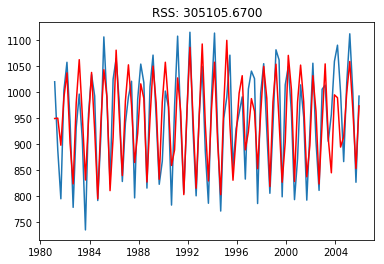

In [43]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(4,0,0))
results = model.fit()
predictions = results.fittedvalues
plt.plot(data)
plt.plot(predictions, color='red')
plt.title('RSS: %.4F' % sum((results.fittedvalues-data['Sales'])**2))
print('Plotting ARIMA model')

In [44]:
results.summary2()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 1113.6785 
Dependent Variable: Sales            Log-Likelihood:      -543.02   
Date:               2019-09-06 05:16 Scale:               1.0000    
No. Observations:   100              Method:              css-mle   
Df Model:           5                Sample:              03-01-1981
Df Residuals:       95                                    12-01-2005
Converged:          1.0000           S.D. of innovations: 54.311    
AIC:                1098.0475        HQIC:                1104.374  
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        949.4899    7.9804  118.9780  0.0000  933.8486  965.1311
ar.L1.Sales    0.0164    0.0784    0.2084  0.8353   -0.1374    0.1701
ar.L2.Sales   -0.2741    0.0765   -3.5836  0.0005   -0.4240   -0.1242
ar.L3.Sales   -0.0195    0.0789   -0.2469  0.8056   -0.1741    0.1351
ar.L4.Sales    0.6149    0.0784    7.8417  0.0000    0.4612    0.7686
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.2278            -0.0000           1.2278            -0.5000
AR.2            0.0117            -1.0351           1.0352            -0.2482
AR.3            0.0117             1.0351           1.0352             0.2482
AR.4            1.2361            -0.0000           1.2361            -0.0000
====================================================================

"""

## 11. Generate Prediction Sales with ARIMA (4,0,0)

In [45]:
data['Predictions'] = pd.DataFrame(predictions).round(0)
data.head()

,Sales,Predictions
Date,,
1981-03-01,1020.2,949.0
1981-06-01,889.2,950.0
1981-09-01,795.0,898.0
1981-12-01,1003.9,990.0
1982-03-01,1057.7,1037.0


## 12. Ploting Sales vs. Predictions with ARIMA (4,0,0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


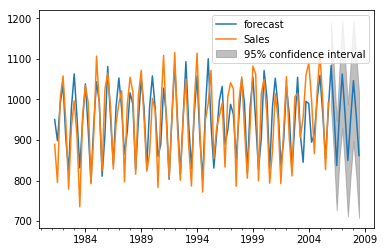

In [68]:
results.plot_predict(1,110)
x = results.forecast(steps=3)

**Predictions Plot** <br>
Dari plot di atas terlihat bahwa hasil forecasting (biru) hampir mendekati pola dari Sales (kuning). Yang perlu digaribawahi adalah nilai dari forecasting mayoritas kurang dari atau sama dengan nilai Sales pada titik yang sama. Sehingga dapat diduga bahwa model yang digunakan sudah baik dan tidak terjadi over-fitting. <br>
Kemudian dari hasil forecasting juga dapat dilihat bahwa pola prediksi (abu-abu) menyerupai pola data Sales. Hal ini dapat memperkuat dugaan bahwa model yang digunakan sudah baik.

## 13. Checking Goodness Models with RMSE & MAPE

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(data['Sales'], data['Predictions'])
RMSE = sqrt(MSE)
print('Nilai RMSE dari model ARIMA(4,0,0) : %.2f' % (RMSE))

Nilai RMSE dari model ARIMA(4,0,0) : 55.22


**RMSE** <br>
Dari nilai RMSE di atas dapat disimpulkan bahwa model yang digunakan untuk forecasting feature Sales sudah baik dan cukup merepresentasikan karakteristik Sales.

In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(data['Sales'], data['Predictions'])
print('Nilai MAPE dari ARIMA(4,0,0) : %.2f%%' % (MAPE))

Nilai MAPE dari ARIMA(4,0,0) : 4.79%


**MAPE** <br>
Kebaikan dari model ARIMA yang digunakan didukung juga dengan nilai MAPE yang kecil. Sebesar 4.7%

## 14. Forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


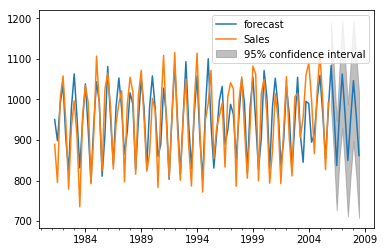

In [72]:
results.plot_predict(1,110)
x = results.forecast()